In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import chainer
from dataset import SquaresDataset
import matplotlib.pyplot as plt
import numpy as np
from functions import *
from tests import *
from chainer import cuda 
import cupy
from chainer.optimizers import MomentumSGD,Adam 

In [3]:
db = SquaresDataset()
# Network initialization
from network import VGGNet
net = VGGNet()
net.to_gpu(0)

# Optimizer
# optimizer =MomentumSGD(lr= 0.05)
optimizer = Adam(alpha= 0.0001)
optimizer.setup(net)

# Move network to gpu

  0%|          | 0/500 [00:00<?, ?it/s]

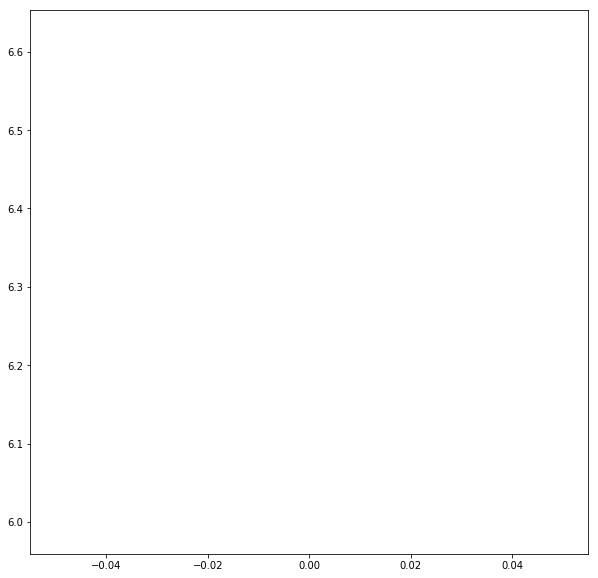

 10%|█         | 50/500 [00:15<02:11,  3.41it/s]

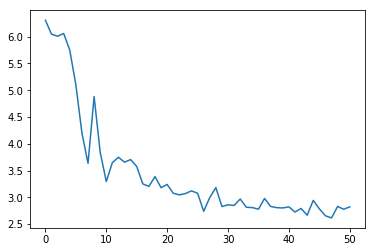

 20%|██        | 100/500 [00:30<01:57,  3.42it/s]

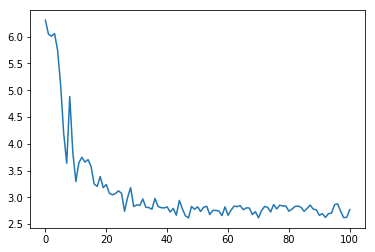

 30%|███       | 150/500 [00:44<01:42,  3.41it/s]

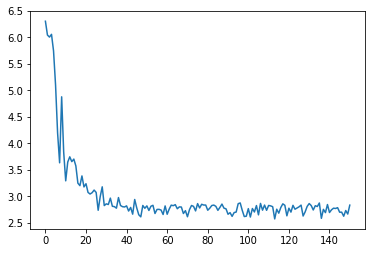

 40%|████      | 200/500 [00:59<01:28,  3.40it/s]

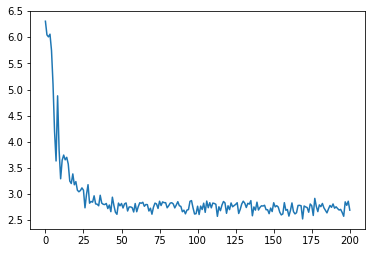

 50%|█████     | 250/500 [01:14<01:13,  3.40it/s]

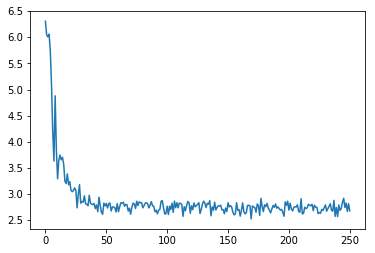

 60%|██████    | 300/500 [01:29<00:58,  3.41it/s]

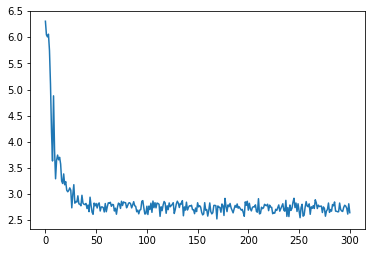

 70%|███████   | 350/500 [01:44<00:43,  3.41it/s]

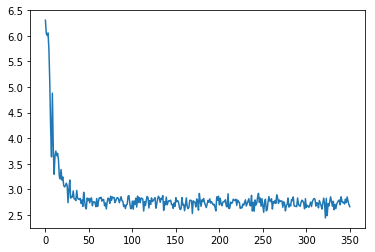

 80%|████████  | 400/500 [01:58<00:29,  3.41it/s]

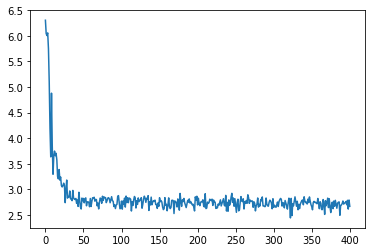

 90%|█████████ | 450/500 [02:13<00:14,  3.41it/s]

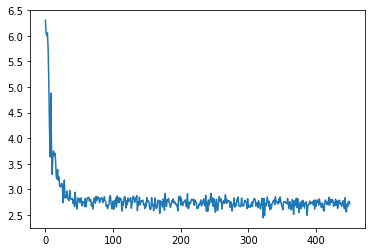

100%|██████████| 500/500 [02:28<00:00,  3.41it/s]


In [4]:
from tqdm import tqdm
losses = []

plt.figure(figsize=(10,10))


# Training for loop
for i in tqdm(range(500)):
    imgs, labels = db.generate_batch(n=10, h=50, w=50, img_h=240, img_w=240)
    imgs_down, labels_down = downsample(imgs, labels)
    
    net.to_gpu(0)

    imgs_gpu = chainer.Variable(cuda.to_gpu(imgs)) #gpu
    
    gt_class, gt_loc = encode_y(imgs_down, labels_down) #cpu
    
    gt_class.to_gpu(0)
    gt_loc.to_gpu(0)

    # Forward pass: SLOW!!!
    pred_class, pred_loc = net(imgs_gpu) #net(imgs) #gpu
    
   # Loss calculation
#     class_loss = classification_loss(pred_class, gt_class)
    class_loss = regression_loss(pred_loc, gt_loc, gt_class)
    
#     net_loss = loss(pred_class, pred_loc, gt_class, gt_loc, lambd=3.0).reshape((1))
    #print(net_loss.debug_print())
    #net_loss.to_gpu(0)
    
    # Update network
    net.zerograds()
    class_loss.backward()
    optimizer.update()
    
    # Print loss
    #show_image(pred_class.data[0,0,:,:], 'prediction output vgg')
    #
    #show_image(gt_class.data[0,0,:,:], 'class output vgg')
    losses.append(class_loss.data.get())
    
    #print(net_loss.data)
    if i % 50 == 0:
        plt.plot(range(len(losses)), losses)
        plt.show()
    
# Final loss plot


## Testing 

In [5]:
# db = SquaresDataset()
# imgs, labels = db.generate_batch(n=10, h=50, w=50, img_h=240, img_w=240)
# imgs_down, labels_down = downsample(imgs, labels)
    

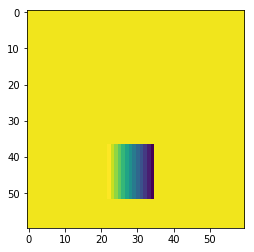

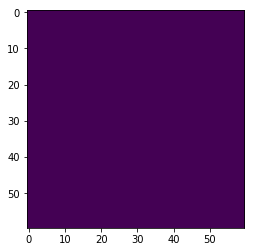

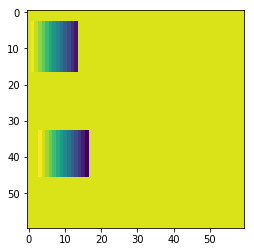

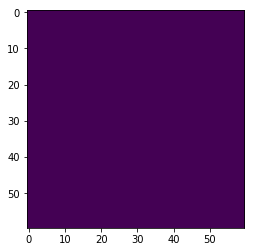

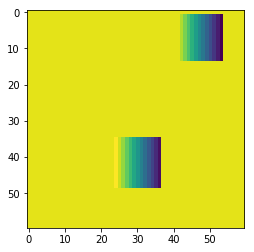

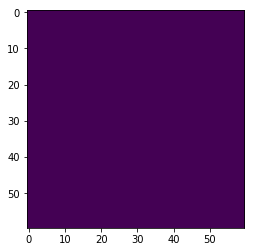

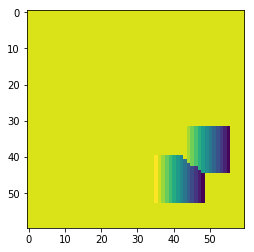

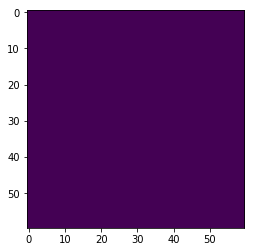

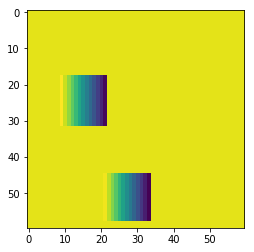

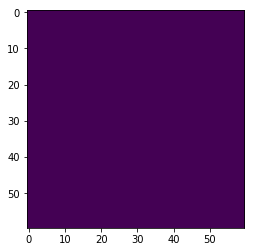

In [6]:
gt_loc.to_cpu()
pred_loc.to_cpu()
gt_class.to_cpu()
pred_class.to_cpu()

for i in range(5):
    plt.figure()
    plt.imshow(gt_loc[i,0,:,:].data)
    plt.show()
    plt.figure()
    plt.imshow(pred_loc[i,0,:,:].data)
    plt.show()

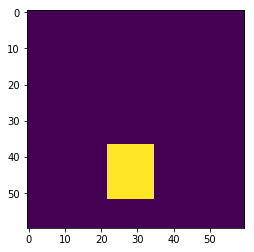

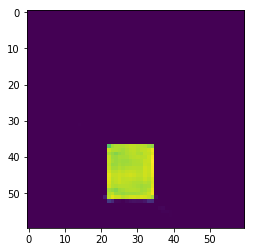

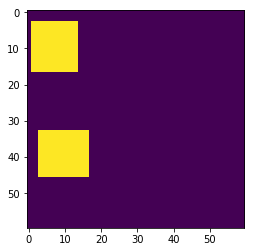

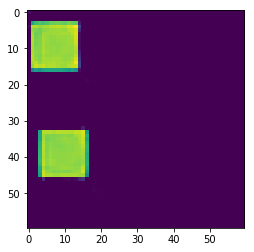

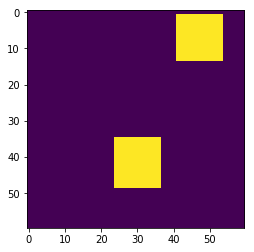

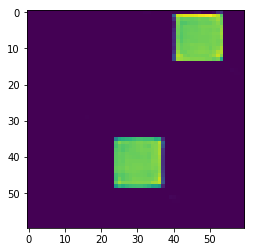

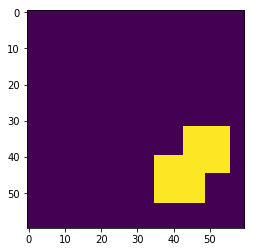

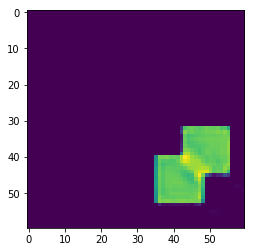

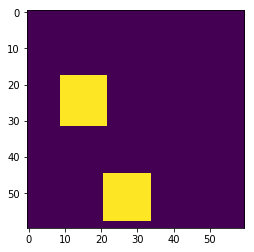

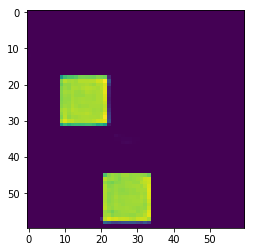

In [7]:
for i in range(5):
    plt.figure()
    plt.imshow(gt_class[i,0,:,:].data)
    plt.show()
    plt.figure()
    plt.imshow(pred_class[i,0,:,:].data)
    plt.show()

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


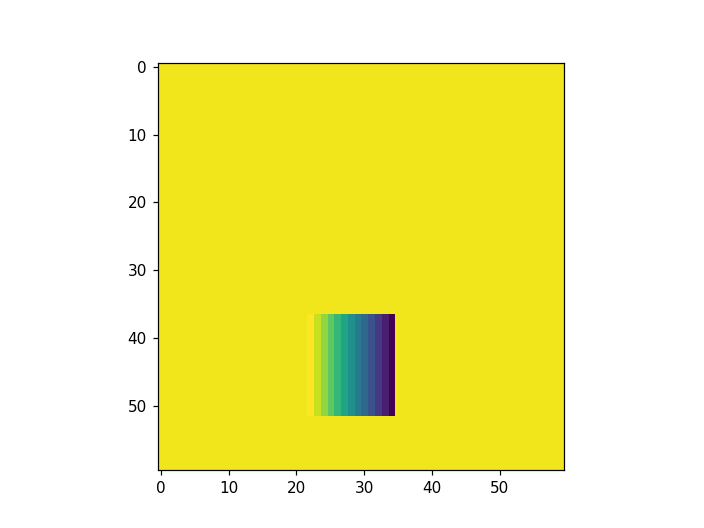

In [9]:
plt.figure()
plt.imshow(gt_loc[0,0,:,:].data)

<IPython.core.display.Javascript object>


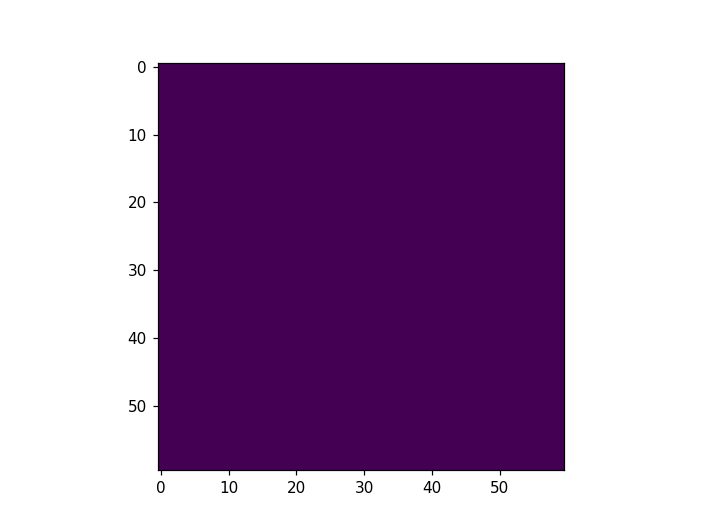

In [10]:
plt.figure()
plt.imshow(pred_loc[0,0,:,:].data)

In [11]:
np.unique(pred_loc[0,0,:,:].data)

array([ 0.], dtype=float32)

In [ ]:
!git status


## IDLE inline implementation of gpu. No functions right now. Everything done inline.